# MODELOS DE PREDICCION DE PEPTIDOS ANTIMICROBIANOS

#### - Edwin Villarraga
#### - Santiago Giraldo
#### - Mauricio
#### - Lesty
#### - Stephany

# <font color='red'>PARTE 1</font>

 # <font color='blue'>PUNTO 1</font>
 
 Cargue los archivos de los conjuntos de datos y aplique normalización

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

## Cargar Datos

In [2]:
#Se cargan los datos negativos
dataN = pd.read_csv('./Datos/DatosNegativos2.csv')

In [3]:
#Se cargan los datos positivos
dataP = pd.read_csv('./Datos/DatosPositivos2.csv')

In [4]:
print("El archivo con datos Negativos tiene {} filas y {} columnas".format(dataN.shape[0],dataN.shape[1]))
print("El archivo con datos Positivos tiene {} filas y {} columnas".format(dataP.shape[0],dataP.shape[1]))

El archivo con datos Negativos tiene 13679 filas y 1760 columnas
El archivo con datos Positivos tiene 8322 filas y 1761 columnas


In [5]:
pd.options.display.max_columns = None
# Modificación de las opciones de pandas para mostrar todas las columnas del dataframe

In [6]:
# Verificación de campos
dataP.head(2)

Unnamed: 0             sequence  length  molecular_weight  charge  \
0           0  CGGYSGGWKRKRSTSYRCG      19           2109.36   4.859   
1           1     GIMISLMKKLAAHIAK      16           1725.22   3.094   

   charge_density  isoelectric_point     gravy  instability_index  \
0        0.002304          10.056702 -1.310526          73.031579   
1        0.001793          10.302063  0.887500          20.918750   

   aromaticity  aliphatic_index  boman_index  hydrophobic_ratio      A  \
0     0.157895            0.000     3.122105           0.105263   0.00   
1     0.000000          140.625    -0.685000           0.625000  18.75   

        R    N    D       C    E    Q       G     H      I     L       K  \
0  15.789  0.0  0.0  10.526  0.0  0.0  26.316  0.00   0.00   0.0  10.526   
1   0.000  0.0  0.0   0.000  0.0  0.0   6.250  6.25  18.75  12.5  18.750   

      M    F    P       S      T      W       Y    V    AA   AR   AN   AD  \
0   0.0  0.0  0.0  15.789  5.263  5.263  10.526  0.0  0.00  0.0  0.0  0.0   
1  12.5  0.0  0.0   6.250  0.000  0.000   0.000  0.0  6.67  0.0  0.0  0.0   

    AC   AE   AQ   AG    AH   AI   AL    AK   AM   AF   AP   AS   AT   AW  \
0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  6.67  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0   

    AY   AV   RA   RR   RN   RD    RC   RE   RQ   RG   RH   RI   RL    RK  \
0  0.0  0.0  0.0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  5.56   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00   

    RM   RF   RP    RS   RT   RW   RY   RV   NA   NR   NN   ND   NC   NE   NQ  \
0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    NG   NH   NI   NL   NK   NM   NF   NP   NS   NT   NW   NY   NV   DA   DR  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DN   DD   DC   DE   DQ   DG   DH   DI   DL   DK   DM   DF   DP   DS   DT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DW   DY   DV   CA   CR   CN   CD   CC   CE   CQ     CG   CH   CI   CL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0   

    CK   CM   CF   CP   CS   CT   CW   CY   CV   EA   ER   EN   ED   EC   EE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EQ   EG   EH   EI   EL   EK   EM   EF   EP   ES   ET   EW   EY   EV   QA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QR   QN   QD   QC   QE   QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QT   QW   QY   QV   GA   GR   GN   GD   GC   GE   GQ     GG   GH    GI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  6.67   

    GL   GK   GM   GF   GP   GS   GT    GW    GY   GV   HA   HR   HN   HD  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.56  5.56  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0   

    HC   HE   HQ   HG   HH    HI   HL   HK   HM   HF   HP   HS   HT   HW   HY  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HV    IA   IR   IN   ID   IC   IE 

In [7]:
dataP = dataP.drop(dataP.columns[0], axis=1, inplace=False) #se crea un dataframe sin la variable respuesta

In [8]:
# Verificación de campos
dataP.head(2)

sequence  length  molecular_weight  charge  charge_density  \
0  CGGYSGGWKRKRSTSYRCG      19           2109.36   4.859        0.002304   
1     GIMISLMKKLAAHIAK      16           1725.22   3.094        0.001793   

   isoelectric_point     gravy  instability_index  aromaticity  \
0          10.056702 -1.310526          73.031579     0.157895   
1          10.302063  0.887500          20.918750     0.000000   

   aliphatic_index  boman_index  hydrophobic_ratio      A       R    N    D  \
0            0.000     3.122105           0.105263   0.00  15.789  0.0  0.0   
1          140.625    -0.685000           0.625000  18.75   0.000  0.0  0.0   

        C    E    Q       G     H      I     L       K     M    F    P  \
0  10.526  0.0  0.0  26.316  0.00   0.00   0.0  10.526   0.0  0.0  0.0   
1   0.000  0.0  0.0   6.250  6.25  18.75  12.5  18.750  12.5  0.0  0.0   

        S      T      W       Y    V    AA   AR   AN   AD   AC   AE   AQ   AG  \
0  15.789  5.263  5.263  10.526  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   6.250  0.000  0.000   0.000  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     AH   AI   AL    AK   AM   AF   AP   AS   AT   AW   AY   AV   RA   RR  \
0  0.00  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  6.67  0.0  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    RN   RD    RC   RE   RQ   RG   RH   RI   RL    RK   RM   RF   RP    RS  \
0  0.0  0.0  5.56  0.0  0.0  0.0  0.0  0.0  0.0  5.56  0.0  0.0  0.0  5.56   
1  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.00   

    RT   RW   RY   RV   NA   NR   NN   ND   NC   NE   NQ   NG   NH   NI   NL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    NK   NM   NF   NP   NS   NT   NW   NY   NV   DA   DR   DN   DD   DC   DE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DQ   DG   DH   DI   DL   DK   DM   DF   DP   DS   DT   DW   DY   DV   CA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CR   CN   CD   CC   CE   CQ     CG   CH   CI   CL   CK   CM   CF   CP  \
0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CS   CT   CW   CY   CV   EA   ER   EN   ED   EC   EE   EQ   EG   EH   EI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EL   EK   EM   EF   EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QE   QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    GA   GR   GN   GD   GC   GE   GQ     GG   GH    GI   GL   GK   GM   GF  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.11  0.0  0.00  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  6.67  0.0  0.0  0.0  0.0   

    GP   GS   GT    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG  \
0  0.0  0.0  0.0  5.56  5.56  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HH    HI   HL   HK   HM   HF   HP   HS   HT   HW   HY   HV    IA   IR  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0   
1  0.0  6.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.67  0.0   

    IN   ID   IC   IE   IQ   IG   IH 

In [9]:
print("El archivo con datos Negativos tiene {} filas y {} columnas".format(dataN.shape[0],dataN.shape[1]))
print("El archivo con datos Positivos tiene {} filas y {} columnas".format(dataP.shape[0],dataP.shape[1]))

El archivo con datos Negativos tiene 13679 filas y 1760 columnas
El archivo con datos Positivos tiene 8322 filas y 1760 columnas


In [10]:
# Verificación de campos
dataN.head(2)

sequence  length  molecular_weight  charge  charge_density  \
0  MAATRNK       7            790.93   1.996        0.002524   
1  MKMDGLR       7            850.06   0.996        0.001172   

   isoelectric_point     gravy  instability_index  aromaticity  \
0          11.000305 -1.014286          77.657143          0.0   
1           8.497986 -0.671429          82.657143          0.0   

   aliphatic_index  boman_index  hydrophobic_ratio       A       R       N  \
0        28.571429     3.387143           0.428571  28.571  14.286  14.286   
1        55.714286     2.661429           0.428571   0.000  14.286   0.000   

        D    C    E    Q       G    H    I       L       K       M    F    P  \
0   0.000  0.0  0.0  0.0   0.000  0.0  0.0   0.000  14.286  14.286  0.0  0.0   
1  14.286  0.0  0.0  0.0  14.286  0.0  0.0  14.286  14.286  28.571  0.0  0.0   

     S       T    W    Y    V     AA   AR   AN   AD   AC   AE   AQ   AG   AH  \
0  0.0  14.286  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0   0.000  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    AI   AL   AK   AM   AF   AP   AS     AT   AW   AY   AV   RA   RR     RN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0  0.0  16.67   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0  0.0   0.00   

    RD   RC   RE   RQ   RG   RH   RI   RL   RK   RM   RF   RP   RS   RT   RW  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    RY   RV   NA   NR   NN   ND   NC   NE   NQ   NG   NH   NI   NL     NK  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00   

    NM   NF   NP   NS   NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      DG   DH   DI   DL   DK   DM   DF   DP   DS   DT   DW   DY   DV   CA  \
0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  16.67  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CR   CN   CD   CC   CE   CQ   CG   CH   CI   CL   CK   CM   CF   CP   CS  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    CT   CW   CY   CV   EA   ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EK   EM   EF   EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QQ   QG   QH   QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV   GA  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    GR   GN   GD   GC   GE   GQ   GG   GH   GI     GL   GK   GM   GF   GP  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.67  0.0  0.0  0.0  0.0   

    GS   GT   GW   GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HL   HK   HM   HF   HP   HS   HT   HW   HY   HV   IA   IR   IN   ID   IC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    IE   IQ   IG   IH   II   IL

No se logra ver en las 1761 columnas la variable respuesta, entonces se adicionará la columna Respuesta=0 en el caso de los negativos y Respuesta=1 en el caso de los positivos.  Luego se unirán los datos en una nuevo Dataframe unificado

In [11]:
#dataN['Respuesta']=0

In [12]:
#dataP['Respuesta']=1

In [13]:
data = dataN.append(dataP) #se unen los datos de las respuestas positivas y negativas

In [14]:
len_id=data['sequence'].unique()

In [15]:
len_id

array(['MAATRNK', 'MKMDGLR', 'MNIKHYQ', ..., 'KKCFRWQWRMKKLGA',
       'GWAGWLLSPRGSRPSWGP', 'LRRLYKRVVKLWKRLFRQLRRPVR'], dtype=object)

In [16]:
len(data)

22001

In [17]:
len(data)-len(len_id)

81

Existen 81 datos de con sequence repetida

In [18]:
data.drop_duplicates(subset ="sequence")

sequence  length  molecular_weight  charge  \
0                      MAATRNK       7            790.93   1.996   
1                      MKMDGLR       7            850.06   0.996   
2                      MNIKHYQ       7            933.09   1.094   
3                      LLWNSIP       7            842.00  -0.004   
4                      MHPHMSY       7            902.05   0.193   
...                        ...     ...               ...     ...   
8317           ILPIIGKILSTIFGK      15           1613.04   1.995   
8318                 YAGAVANDL       9            892.96  -1.004   
8319           KKCFRWQWRMKKLGA      15           1966.43   5.927   
8320        GWAGWLLSPRGSRPSWGP      18           1967.20   1.996   
8321  LRRLYKRVVKLWKRLFRQLRRPVR      24           3237.00  10.994   

      charge_density  isoelectric_point     gravy  instability_index  \
0           0.002524          11.000305 -1.014286          77.657143   
1           0.001172           8.497986 -0.671429          82.657143   
2           0.001172           8.365906 -1.285714         121.985714   
3          -0.000005           5.524963  0.757143          55.914286   
4           0.000214           6.688049 -0.900000         149.057143   
...              ...                ...       ...                ...   
8317        0.001237          10.002747  1.413333          30.873333   
8318       -0.001124           3.799866  0.522222          25.766667   
8319        0.003014          11.172302 -1.166667          36.200000   
8320        0.001015          12.000061 -0.616667          63.505556   
8321        0.003396          12.480896 -0.858333         129.737500   

      aromaticity  aliphatic_index  boman_index  hydrophobic_ratio       A  \
0        0.000000        28.571429     3.387143           0.428571  28.571   
1        0.000000        55.714286     2.661429           0.428571   0.000   
2        0.142857        55.714286     2.180000           0.285714   0.000   
3        0.142857       167.142857    -1.007143           0.428571   0.000   
4        0.142857         0.000000     1.165714           0.285714   0.000   
...           ...              ...          ...                ...     ...   
8317     0.066667       182.000000    -1.482000           0.533333   0.000   
8318     0.111111       108.888889     0.018889           0.555556  33.333   
8319     0.200000        32.666667     2.576000           0.333333   6.667   
8320     0.166667        48.888889     0.980000           0.166667   5.556   
8321     0.125000       117.500000     4.152500           0.375000   0.000   

           R       N       D      C    E       Q       G       H       I  \
0     14.286  14.286   0.000  0.000  0.0   0.000   0.000   0.000   0.000   
1     14.286   0.000  14.286  0.000  0.0   0.000  14.286   0.000   0.000   
2      0.000  14.286   0.000  0.000  0.0  14.286   0.000  14.286  14.286   
3      0.000  14.286   0.000  0.000  0.0   0.000   0.000   0.000  14.286   
4      0.000   0.000   0.000  0.000  0.0   0.000   0.000  28.571   0.000   
...      ...     ...     ...    ...  ...     ...     ...     ...     ...   
8317   0.000   0.000   0.000  0.000  0.0   0.000  13.333   0.000  33.333   
8318   0.000  11.111  11.111  0.000  0.0   0.000  11.111   0.000   0.000   
8319  13.333   0.000   0.000  6.667  0.0   6.667   6.667   0.000   0.000   
8320  11.111   0.000   0.000  0.000  0.0   0.000  22.222   0.000   0.000   
8321  33.333   0.000   0.000  0.000  0.0   4.167   0.000   0.000   0.000   

           L       K       M      F       P       S       T       W       Y  \
0      0.000  14.286  14.286  0.000   0.000   0.000  14.286   0.000   0.000   
1     14.286  14.286  28.571  0.000   0.000   0.000   0.000   0.000   0.000   
2      0.000  14.286  14.286  0.000   0.000   0.000   0.000   0.000  14.286   
3     28.571   0.000   0.000  0.000  14.286  14.286   0.000  14.286   0.000   
4      0.000   0.000  28.571  0.000  14.286  14.286   0.000   0.000  14.286   
...      ...    

In [19]:
#Se extrae una lista de las variables que contengan valores nulos
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]
vars_with_na

[]

Significa que no hay variables con valores nulos

## Análisis Descriptivo de los Datos

In [20]:
data.shape

(22001, 1760)

In [21]:
# lista de variables numericas
num_vars = [var for var in data.columns if data[var].dtypes != 'O']  #'O' significa python objects
len(num_vars)

1759

Todas las variables son numéricas excepto 1, que es la sequencia, que actua como identificador de la molécula

## Escalamiento

In [22]:
# Se excluye la variable Sequencia
data.drop(['sequence'], axis=1, inplace=True)

In [23]:
data.shape

(22001, 1759)

In [24]:
Ydata = data['class']
Xdata = data.drop(['class'], axis=1, inplace=False) #se crea un dataframe sin la variable respuesta

print(Xdata.shape)
print(Ydata.shape)

(22001, 1758)
(22001,)


In [25]:
train_vars = [var for var in Xdata.columns]
all_vars = [var for var in data.columns]

In [26]:
#ajuste del escalador
scaler = StandardScaler()  #se crea una instancia del escalador
scaler.fit(Xdata)

Xdata_std = pd.DataFrame(scaler.transform(Xdata), columns=train_vars) #  se ajusta el escalador a los datos de entrenamiento


In [27]:
type(Xdata_std)

pandas.core.frame.DataFrame

In [28]:
Xdata_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0 -1.514024         -1.579527  0.253299        1.408902           1.169415   
1 -1.514024         -1.509540 -0.101136        0.413288           0.211832   

     gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.91603           0.928213    -1.269079        -1.103023     1.216043   
1 -0.53095           1.052205    -1.269079        -0.506175     0.773160   

   hydrophobic_ratio         A        R         N         D         C  \
0           0.219189  2.931984  0.80486  1.956354 -0.690811 -0.638053   
1           0.219189 -0.855656  0.80486 -0.748756  1.929725 -0.638053   

         E         Q         G         H         I         L         K  \
0 -0.69519 -0.432758 -0.902029 -0.624093 -0.883704 -0.952024  0.636993   
1 -0.69519 -0.432758  1.182301 -0.624093 -0.883704  0.601018  0.636993   

          M         F         P         S         T         W         Y  \
0  2.026864 -0.821284 -0.745835 -0.865377  1.685636 -0.577118 -0.704628   
1  4.823592 -0.821284 -0.745835 -0.865377 -0.805788 -0.577118 -0.704628   

          V        AA        AR       AN        AD        AC        AE  \
0 -0.881001  6.889079 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   
1 -0.881001 -0.259575 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   

         AQ      AG        AH        AI        AL        AK        AM  \
0 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   
1 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   

        AF        AP        AS         AT        AW        AY        AV  \
0 -0.19956 -0.186333 -0.233629  11.134791 -0.161766 -0.162987 -0.239062   
1 -0.19956 -0.186333 -0.233629  -0.207886 -0.161766 -0.162987 -0.239062   

         RA        RR         RN        RD        RC        RE        RQ  \
0 -0.199029 -0.268165  12.462255 -0.175463 -0.193301 -0.172387 -0.129776   
1 -0.199029 -0.268165  -0.192084 -0.175463 -0.193301 -0.172387 -0.129776   

         RG        RH        RI        RL        RK        RM        RF  \
0 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   
1 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   

         RP        RS        RT        RW        RY        RV       NA  \
0 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   
1 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   

         NR        NN        ND        NC        NE       NQ        NG  \
0 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   
1 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   

         NH        NI        NL         NK        NM        NF        NP  \
0 -0.152989 -0.178202 -0.210945  13.074549 -0.143078 -0.171583 -0.165864   
1 -0.152989 -0.178202 -0.210945  -0.185314 -0.143078 -0.171583 -0.165864   

         NS       NT        NW        NY        NV        DA        DR  \
0 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   
1 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   

        DN       DD        DC        DE        DQ         DG        DH  \
0 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  -0.171683 -0.134733   
1 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  13.037266 -0.134733   

         DI        DL        DK        DM        DF        DP        DS  \
0 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   
1 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   

         DT       DW        DY      DV        CA        CR        CN  \
0 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   
1 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   

         CD      CC        CE        CQ        CG       CH        CI  \
0 -0.143506 -0.1392 -0.140694 -0.084573 -0.183858 -0.13997 -0.160734   
1 -0.143506 -0.1392 -0.140694 -0.084573 

In [29]:
Xdata_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0 -1.514024         -1.579527  0.253299        1.408902           1.169415   
1 -1.514024         -1.509540 -0.101136        0.413288           0.211832   

     gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.91603           0.928213    -1.269079        -1.103023     1.216043   
1 -0.53095           1.052205    -1.269079        -0.506175     0.773160   

   hydrophobic_ratio         A        R         N         D         C  \
0           0.219189  2.931984  0.80486  1.956354 -0.690811 -0.638053   
1           0.219189 -0.855656  0.80486 -0.748756  1.929725 -0.638053   

         E         Q         G         H         I         L         K  \
0 -0.69519 -0.432758 -0.902029 -0.624093 -0.883704 -0.952024  0.636993   
1 -0.69519 -0.432758  1.182301 -0.624093 -0.883704  0.601018  0.636993   

          M         F         P         S         T         W         Y  \
0  2.026864 -0.821284 -0.745835 -0.865377  1.685636 -0.577118 -0.704628   
1  4.823592 -0.821284 -0.745835 -0.865377 -0.805788 -0.577118 -0.704628   

          V        AA        AR       AN        AD        AC        AE  \
0 -0.881001  6.889079 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   
1 -0.881001 -0.259575 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   

         AQ      AG        AH        AI        AL        AK        AM  \
0 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   
1 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   

        AF        AP        AS         AT        AW        AY        AV  \
0 -0.19956 -0.186333 -0.233629  11.134791 -0.161766 -0.162987 -0.239062   
1 -0.19956 -0.186333 -0.233629  -0.207886 -0.161766 -0.162987 -0.239062   

         RA        RR         RN        RD        RC        RE        RQ  \
0 -0.199029 -0.268165  12.462255 -0.175463 -0.193301 -0.172387 -0.129776   
1 -0.199029 -0.268165  -0.192084 -0.175463 -0.193301 -0.172387 -0.129776   

         RG        RH        RI        RL        RK        RM        RF  \
0 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   
1 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   

         RP        RS        RT        RW        RY        RV       NA  \
0 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   
1 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   

         NR        NN        ND        NC        NE       NQ        NG  \
0 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   
1 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   

         NH        NI        NL         NK        NM        NF        NP  \
0 -0.152989 -0.178202 -0.210945  13.074549 -0.143078 -0.171583 -0.165864   
1 -0.152989 -0.178202 -0.210945  -0.185314 -0.143078 -0.171583 -0.165864   

         NS       NT        NW        NY        NV        DA        DR  \
0 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   
1 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   

        DN       DD        DC        DE        DQ         DG        DH  \
0 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  -0.171683 -0.134733   
1 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  13.037266 -0.134733   

         DI        DL        DK        DM        DF        DP        DS  \
0 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   
1 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   

         DT       DW        DY      DV        CA        CR        CN  \
0 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   
1 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   

         CD      CC        CE        CQ        CG       CH        CI  \
0 -0.143506 -0.1392 -0.140694 -0.084573 -0.183858 -0.13997 -0.160734   
1 -0.143506 -0.1392 -0.140694 -0.084573 

In [30]:
Xdata_std.tail(2)

length  molecular_weight    charge  charge_density  \
21999 -0.032530         -0.187283  0.253299        0.297636   
22000  0.775557          1.315664  3.442511        2.051625   

       isoelectric_point     gravy  instability_index  aromaticity  \
21999           1.552000 -0.469444           0.577278     0.368274   
22000           1.736005 -0.740872           2.219717    -0.041064   

       aliphatic_index  boman_index  hydrophobic_ratio         A         R  \
21999        -0.656259    -0.252971          -1.617457 -0.119101  0.454312   
22000         0.852441     1.683120          -0.156488 -0.855656  2.907815   

              N         D         C        E         Q         G         H  \
21999 -0.748756 -0.690811 -0.638053 -0.69519 -0.432758  2.340165 -0.624093   
22000 -0.748756 -0.690811 -0.638053 -0.69519  0.642561 -0.902029 -0.624093   

              I         L         K         M         F         P         S  \
21999 -0.883704  0.255862 -0.819986 -0.770061 -0.821284  1.867580  1.833767   
22000 -0.883704  1.312748  0.454845 -0.770061 -0.167300 -0.092442 -0.865377   

              T         W         Y         V        AA        AR       AN  \
21999 -0.805788  1.806964 -0.704628 -0.881001 -0.259575 -0.211631 -0.17783   
22000 -0.805788  0.018938  0.099720  1.086456 -0.259575 -0.211631 -0.17783   

             AD        AC        AE        AQ        AG        AH        AI  \
21999 -0.179048 -0.166896 -0.184666 -0.120244  3.073881 -0.167058 -0.232492   
22000 -0.179048 -0.166896 -0.184666 -0.120244 -0.254400 -0.167058 -0.232492   

             AL        AK        AM       AF        AP        AS        AT  \
21999 -0.283666 -0.248786 -0.153396 -0.19956 -0.186333 -0.233629 -0.207886   
22000 -0.283666 -0.248786 -0.153396 -0.19956 -0.186333 -0.233629 -0.207886   

             AW        AY        AV        RA        RR        RN        RD  \
21999 -0.161766 -0.162987 -0.239062 -0.199029 -0.268165 -0.192084 -0.175463   
22000 -0.161766 -0.162987 -0.239062 -0.199029  2.639475 -0.192084 -0.175463   

             RC        RE        RQ        RG        RH        RI        RL  \
21999 -0.193301 -0.172387 -0.129776  3.429526 -0.161697 -0.219905 -0.248801   
22000 -0.193301 -0.172387  5.013153 -0.222452 -0.161697 -0.219905  3.617382   

             RK        RM        RF        RP        RS        RT        RW  \
21999 -0.244276 -0.147348 -0.209237  3.148769 -0.196468 -0.191603 -0.181997   
22000 -0.244276 -0.147348 -0.209237  2.282846 -0.196468 -0.191603 -0.181997   

             RY        RV       NA        NR        NN        ND        NC  \
21999 -0.170989 -0.211804 -0.19085 -0.184247 -0.165021 -0.154516 -0.148899   
22000 -0.170989  2.328675 -0.19085 -0.184247 -0.165021 -0.154516 -0.148899   

             NE       NQ        NG        NH        NI        NL        NK  \
21999 -0.152353 -0.10412 -0.174682 -0.152989 -0.178202 -0.210945 -0.185314   
22000 -0.152353 -0.10412 -0.174682 -0.152989 -0.178202 -0.210945 -0.185314   

             NM        NF        NP        NS       NT        NW        NY  \
21999 -0.143078 -0.171583 -0.165864 -0.180579 -0.16452 -0.149083 -0.153154   
22000 -0.143078 -0.171583 -0.165864 -0.180579 -0.16452 -0.149083 -0.153154   

             NV        DA        DR       DN       DD        DC        DE  \
21999 -0.176362 -0.183691 -0.164376 -0.15346 -0.14147 -0.140379 -0.154357   
22000 -0.176362 -0.183691 -0.164376 -0.15346 -0.14147 -0.140379 -0.154357   

             DQ        DG        DH        DI        DL        DK        DM  \
21999 -0.079071 -0.171683 -0.134733 -0.178413 -0.199371 -0.182147 -0.139556   
22000 -0.079071 -0.171683 -0.134733 -0.178413 -0.199371 -0.182147 -0.139556   

             DF        DP        DS        DT       DW        DY      DV  \
21999 -0.169263 -0.159091 -0.169462 -0.173369 -0.14477 -0.152286 -0.1819   
22000 -0.169263 -0.159091 -0.169462 -0.173369 -0.14477 -0.152286 -0.1819   

             CA        CR        CN        CD      CC        CE        CQ 

In [31]:
type(Xdata_std)

pandas.core.frame.DataFrame

 # <font color='blue'>PUNTO 2</font>
 
Divida el conjunto de datos en 2 subconjuntos: un conjunto con el 80% de las muestras para el
entrenamiento (training) y otro con el 20% restante como conjunto de pruebas (testing)

### Dividir los datos en train y test

In [32]:
type(Ydata)

pandas.core.series.Series

In [33]:
Ydata.shape

(22001,)

In [34]:
Xdata_std.shape

(22001, 1758)

In [35]:
Xdata_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0 -1.514024         -1.579527  0.253299        1.408902           1.169415   
1 -1.514024         -1.509540 -0.101136        0.413288           0.211832   

     gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.91603           0.928213    -1.269079        -1.103023     1.216043   
1 -0.53095           1.052205    -1.269079        -0.506175     0.773160   

   hydrophobic_ratio         A        R         N         D         C  \
0           0.219189  2.931984  0.80486  1.956354 -0.690811 -0.638053   
1           0.219189 -0.855656  0.80486 -0.748756  1.929725 -0.638053   

         E         Q         G         H         I         L         K  \
0 -0.69519 -0.432758 -0.902029 -0.624093 -0.883704 -0.952024  0.636993   
1 -0.69519 -0.432758  1.182301 -0.624093 -0.883704  0.601018  0.636993   

          M         F         P         S         T         W         Y  \
0  2.026864 -0.821284 -0.745835 -0.865377  1.685636 -0.577118 -0.704628   
1  4.823592 -0.821284 -0.745835 -0.865377 -0.805788 -0.577118 -0.704628   

          V        AA        AR       AN        AD        AC        AE  \
0 -0.881001  6.889079 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   
1 -0.881001 -0.259575 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   

         AQ      AG        AH        AI        AL        AK        AM  \
0 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   
1 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   

        AF        AP        AS         AT        AW        AY        AV  \
0 -0.19956 -0.186333 -0.233629  11.134791 -0.161766 -0.162987 -0.239062   
1 -0.19956 -0.186333 -0.233629  -0.207886 -0.161766 -0.162987 -0.239062   

         RA        RR         RN        RD        RC        RE        RQ  \
0 -0.199029 -0.268165  12.462255 -0.175463 -0.193301 -0.172387 -0.129776   
1 -0.199029 -0.268165  -0.192084 -0.175463 -0.193301 -0.172387 -0.129776   

         RG        RH        RI        RL        RK        RM        RF  \
0 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   
1 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   

         RP        RS        RT        RW        RY        RV       NA  \
0 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   
1 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   

         NR        NN        ND        NC        NE       NQ        NG  \
0 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   
1 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   

         NH        NI        NL         NK        NM        NF        NP  \
0 -0.152989 -0.178202 -0.210945  13.074549 -0.143078 -0.171583 -0.165864   
1 -0.152989 -0.178202 -0.210945  -0.185314 -0.143078 -0.171583 -0.165864   

         NS       NT        NW        NY        NV        DA        DR  \
0 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   
1 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   

        DN       DD        DC        DE        DQ         DG        DH  \
0 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  -0.171683 -0.134733   
1 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071  13.037266 -0.134733   

         DI        DL        DK        DM        DF        DP        DS  \
0 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   
1 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   

         DT       DW        DY      DV        CA        CR        CN  \
0 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   
1 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   

         CD      CC        CE        CQ        CG       CH        CI  \
0 -0.143506 -0.1392 -0.140694 -0.084573 -0.183858 -0.13997 -0.160734   
1 -0.143506 -0.1392 -0.140694 -0.084573 

In [36]:
Xdata_std.reset_index(drop=True, inplace=True)
Ydata.to_frame()
Ydata.reset_index(drop=True, inplace=True)

In [37]:
Data = pd.concat([Xdata_std,Ydata], axis=1)

In [38]:
Data.tail(2)

length  molecular_weight    charge  charge_density  \
21999 -0.032530         -0.187283  0.253299        0.297636   
22000  0.775557          1.315664  3.442511        2.051625   

       isoelectric_point     gravy  instability_index  aromaticity  \
21999           1.552000 -0.469444           0.577278     0.368274   
22000           1.736005 -0.740872           2.219717    -0.041064   

       aliphatic_index  boman_index  hydrophobic_ratio         A         R  \
21999        -0.656259    -0.252971          -1.617457 -0.119101  0.454312   
22000         0.852441     1.683120          -0.156488 -0.855656  2.907815   

              N         D         C        E         Q         G         H  \
21999 -0.748756 -0.690811 -0.638053 -0.69519 -0.432758  2.340165 -0.624093   
22000 -0.748756 -0.690811 -0.638053 -0.69519  0.642561 -0.902029 -0.624093   

              I         L         K         M         F         P         S  \
21999 -0.883704  0.255862 -0.819986 -0.770061 -0.821284  1.867580  1.833767   
22000 -0.883704  1.312748  0.454845 -0.770061 -0.167300 -0.092442 -0.865377   

              T         W         Y         V        AA        AR       AN  \
21999 -0.805788  1.806964 -0.704628 -0.881001 -0.259575 -0.211631 -0.17783   
22000 -0.805788  0.018938  0.099720  1.086456 -0.259575 -0.211631 -0.17783   

             AD        AC        AE        AQ        AG        AH        AI  \
21999 -0.179048 -0.166896 -0.184666 -0.120244  3.073881 -0.167058 -0.232492   
22000 -0.179048 -0.166896 -0.184666 -0.120244 -0.254400 -0.167058 -0.232492   

             AL        AK        AM       AF        AP        AS        AT  \
21999 -0.283666 -0.248786 -0.153396 -0.19956 -0.186333 -0.233629 -0.207886   
22000 -0.283666 -0.248786 -0.153396 -0.19956 -0.186333 -0.233629 -0.207886   

             AW        AY        AV        RA        RR        RN        RD  \
21999 -0.161766 -0.162987 -0.239062 -0.199029 -0.268165 -0.192084 -0.175463   
22000 -0.161766 -0.162987 -0.239062 -0.199029  2.639475 -0.192084 -0.175463   

             RC        RE        RQ        RG        RH        RI        RL  \
21999 -0.193301 -0.172387 -0.129776  3.429526 -0.161697 -0.219905 -0.248801   
22000 -0.193301 -0.172387  5.013153 -0.222452 -0.161697 -0.219905  3.617382   

             RK        RM        RF        RP        RS        RT        RW  \
21999 -0.244276 -0.147348 -0.209237  3.148769 -0.196468 -0.191603 -0.181997   
22000 -0.244276 -0.147348 -0.209237  2.282846 -0.196468 -0.191603 -0.181997   

             RY        RV       NA        NR        NN        ND        NC  \
21999 -0.170989 -0.211804 -0.19085 -0.184247 -0.165021 -0.154516 -0.148899   
22000 -0.170989  2.328675 -0.19085 -0.184247 -0.165021 -0.154516 -0.148899   

             NE       NQ        NG        NH        NI        NL        NK  \
21999 -0.152353 -0.10412 -0.174682 -0.152989 -0.178202 -0.210945 -0.185314   
22000 -0.152353 -0.10412 -0.174682 -0.152989 -0.178202 -0.210945 -0.185314   

             NM        NF        NP        NS       NT        NW        NY  \
21999 -0.143078 -0.171583 -0.165864 -0.180579 -0.16452 -0.149083 -0.153154   
22000 -0.143078 -0.171583 -0.165864 -0.180579 -0.16452 -0.149083 -0.153154   

             NV        DA        DR       DN       DD        DC        DE  \
21999 -0.176362 -0.183691 -0.164376 -0.15346 -0.14147 -0.140379 -0.154357   
22000 -0.176362 -0.183691 -0.164376 -0.15346 -0.14147 -0.140379 -0.154357   

             DQ        DG        DH        DI        DL        DK        DM  \
21999 -0.079071 -0.171683 -0.134733 -0.178413 -0.199371 -0.182147 -0.139556   
22000 -0.079071 -0.171683 -0.134733 -0.178413 -0.199371 -0.182147 -0.139556   

             DF        DP        DS        DT       DW        DY      DV  \
21999 -0.169263 -0.159091 -0.169462 -0.173369 -0.14477 -0.152286 -0.1819   
22000 -0.169263 -0.159091 -0.169462 -0.173369 -0.14477 -0.152286 -0.1819   

             CA        CR        CN        CD      CC        CE        CQ 

In [39]:
#Data.drop(Data.columns[0], axis=1, inplace = True)

In [40]:
# Separación de los datos en train y test
# random_state para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(Data, Data['class'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17600, 1759), (4401, 1759), (17600,), (4401,))

In [41]:
#eliminar la variable respuesta de X_train y X_test
X_train.drop(['class'], axis=1, inplace=True)
X_test.drop(['class',], axis=1, inplace=True)


 # <font color='blue'>PUNTOS 3 y 4</font>
 
Punto 3:  Divida el conjunto de datos en 2 subconjuntos: un conjunto con el 80% de las muestras para el
entrenamiento (training) y otro con el 20% restante como conjunto de pruebas (testing)

Punto 4: El clasificador debe ser entrenado con los datos de entrenamiento de la partición. Se debe usar
validación cruzada para la medición del desempeño.

## MODELO 1: Regresión Logística

In [42]:
y_train.head(2)

2569    0
2976    0
Name: class, dtype: int64

In [43]:
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [44]:
X_train.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
2569  0.506195          0.542874  0.253654        0.119539           0.783747   
2976  0.910239          0.712165  0.642824        0.386197           1.552000   

         gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
2569  0.703057          -0.921465     0.517124         0.407661    -0.575306   
2976 -0.410292           0.407917    -1.269079        -0.016130     0.738845   

      hydrophobic_ratio         A         R         N         D         C  \
2569           0.720093 -0.855656 -0.270632  0.972660 -0.690811 -0.638053   
2976          -0.261678  0.735176  0.994100  0.008659  0.042925 -0.638053   

             E         Q         G         H         I         L         K  \
2569  0.144612 -0.432758 -0.238913 -0.624093 -0.168219  0.530356  0.107173   
2976 -0.695190  1.631689  0.265172  0.092358 -0.254015 -0.517181 -0.819986   

             M         F         P         S         T         W         Y  \
2569  0.119763  2.032265  0.679650  0.606869 -0.805788 -0.577118 -0.704628   
2976  0.013062 -0.821284  1.135786 -0.217595 -0.108203 -0.577118 -0.704628   

             V        AA        AR       AN        AD        AC        AE  \
2569  0.549891 -0.259575 -0.211631 -0.17783 -0.179048 -0.166896 -0.184666   
2976  1.007757  1.528661  2.252356 -0.17783 -0.179048 -0.166896 -0.184666   

            AQ      AG        AH        AI        AL        AK        AM  \
2569 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   
2976 -0.120244 -0.2544 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   

           AF        AP        AS        AT        AW        AY        AV  \
2569 -0.19956 -0.186333 -0.233629 -0.207886 -0.161766 -0.162987 -0.239062   
2976 -0.19956 -0.186333 -0.233629 -0.207886 -0.161766 -0.162987  2.188287   

            RA        RR        RN        RD        RC        RE        RQ  \
2569 -0.199029 -0.268165 -0.192084 -0.175463 -0.193301 -0.172387 -0.129776   
2976 -0.199029 -0.268165 -0.192084  3.314476 -0.193301 -0.172387 -0.129776   

            RG        RH        RI        RL        RK        RM        RF  \
2569 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   
2976  2.367471  2.830449 -0.219905 -0.248801 -0.244276 -0.147348 -0.209237   

            RP        RS        RT        RW        RY        RV        NA  \
2569 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989  2.568122 -0.190850   
2976 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804  2.983634   

            NR        NN        ND        NC        NE       NQ        NG  \
2569 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   
2976 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   

            NH        NI        NL        NK        NM        NF        NP  \
2569 -0.152989 -0.178202 -0.210945 -0.185314 -0.143078 -0.171583  7.338342   
2976 -0.152989 -0.178202 -0.210945 -0.185314 -0.143078 -0.171583 -0.165864   

            NS       NT        NW        NY        NV        DA        DR  \
2569 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   
2976 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362  3.148491 -0.164376   

           DN       DD        DC        DE        DQ        DG        DH  \
2569 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071 -0.171683 -0.134733   
2976 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071 -0.171683 -0.134733   

            DI        DL        DK        DM        DF        DP        DS  \
2569 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   
2976 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   

            DT       DW        DY      DV        CA        CR        CN  \
2569 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   
2976 -0.173369 -0.14477 -0.152286 -0.1819 -0.173821 -0.190202 -0.155181   

            CD      CC        CE  

In [45]:
kfold = KFold(n_splits=10, random_state=0)
model_kfold = LogisticRegression()
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold,n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.6min remaining:  3.7min


Accuracy: 88.63%


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.0min finished


## Modelo 2 - Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
kfold = KFold(n_splits=10, random_state=0)
model_kfold = RandomForestClassifier(random_state=0)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.2s remaining:    6.8s


Accuracy: 88.04%


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s finished


## Modelo 3 - Máquina de Vectores de Soporte

In [48]:
from sklearn import svm

In [138]:
#con Kernel (RBF) Radial Basis Function - Gamma = 1
kfold = KFold(n_splits=10, random_state=0)
model_kfold = svm.SVC(kernel='rbf', max_iter=10000)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 12.3min remaining:  8.2min


Accuracy: 90.85%


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 17.8min finished


## Modelo 4 - Adaboost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
kfold = KFold(n_splits=10, random_state=0)
model_kfold = AdaBoostClassifier(n_estimators=100, random_state=0)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  3.7min remaining:  2.5min


Accuracy: 88.38%


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.0min finished


## Modelo 5 - Clasificador XGBoost

In [52]:
from xgboost import XGBClassifier

In [53]:
kfold = KFold(n_splits=10, random_state=0)
model_kfold  = XGBClassifier()
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.3min remaining:  1.5min


Accuracy: 90.17%


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished


## MODELO 6 - Histogram-based Gradient Boosting Classification Tree.

In [54]:
from sklearn.experimental import enable_hist_gradient_boosting

In [55]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [56]:
"""
kfold = KFold(n_splits=2, random_state=0)
model_kfold  = HistGradientBoostingClassifier()
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
"""

'\nkfold = KFold(n_splits=2, random_state=0)\nmodel_kfold  = HistGradientBoostingClassifier()\nresults_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold, n_jobs=-1, verbose=1)\nprint("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) \n'

Utilizando validación cruzada sobre los datos de entrenamiento, los mejores modelos son:

|Modelo|Accuracy|
| --- | --- |
| **Regresión Logística**| 88.63% |
| **Bosques Aleatorios**| 88.04% | 
| **Máquina de Vectores de Soporte**| **90.85%** |
| **Adaboost**| 88.38% |
|**XGBoost**| **90.17%**|
|**Histogram-based Gradient Boosting Classification Tree**| **94.2%** |

 # <font color='blue'>PUNTO 5</font>
 
Use el conjunto de prueba para evaluar los clasificadores. Las métricas a usar son: matriz de
confusión, precision, recall y F1-score.  En este caso el conjunto de prueba corresponde al 20% de datos no usados en el entrenamiento.

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Validación de los modelos con los datos de prueba

## MODELO 1: Regresión Logística

In [43]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train) #con todas las variables
y_pred = lr.predict(X_test)
print("{0:.1%} precisión del modelo".format(accuracy_score(y_test, y_pred))) 

88.0% precisión del modelo


In [45]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test, labels=[0,1]))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

Matriz de Confusión
[[2481  273]
 [ 255 1392]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2754
           1       0.84      0.85      0.84      1647

    accuracy                           0.88      4401
   macro avg       0.87      0.87      0.87      4401
weighted avg       0.88      0.88      0.88      4401



## MODELO 2 - Clasificador de Bosques Aleatorios

In [60]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

88.0% accuracy on test set.


In [61]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2620  411]
 [ 116 1254]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3031
           1       0.75      0.92      0.83      1370

    accuracy                           0.88      4401
   macro avg       0.86      0.89      0.87      4401
weighted avg       0.89      0.88      0.88      4401



## MODELO 3 - Máquina de Vectores de Soporte

In [132]:
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

90.6% accuracy on test set.


In [136]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

Matriz de Confusión
[[2613  326]
 [ 123 1339]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2939
           1       0.80      0.92      0.86      1462

    accuracy                           0.90      4401
   macro avg       0.88      0.90      0.89      4401
weighted avg       0.90      0.90      0.90      4401



## MODELO 4 - Adaboost

In [64]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

86.9% accuracy on test set.


In [133]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2631  309]
 [ 105 1356]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2940
           1       0.81      0.93      0.87      1461

    accuracy                           0.91      4401
   macro avg       0.89      0.91      0.90      4401
weighted avg       0.91      0.91      0.91      4401



## MODELO 5 - XGboost

In [66]:
clf =  XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

89.1% accuracy on test set.


In [67]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2604  348]
 [ 132 1317]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2952
           1       0.79      0.91      0.85      1449

    accuracy                           0.89      4401
   macro avg       0.87      0.90      0.88      4401
weighted avg       0.90      0.89      0.89      4401



## MODELO 6 - Histogram-based Gradient Boosting Classification Tree.

In [130]:
clf =  HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

94.2% accuracy on test set.


In [46]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

Matriz de Confusión
[[2481  273]
 [ 255 1392]]
Predicted     0     1   All
True                       
0          2481   255  2736
1           273  1392  1665
All        2754  1647  4401
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2754
           1       0.84      0.85      0.84      1647

    accuracy                           0.88      4401
   macro avg       0.87      0.87      0.87      4401
weighted avg       0.88      0.88      0.88      4401



Los resultados obtenidos son en los modelos con datos sin reducción de variables y aplicando los modelos a los datos de prueba:


|Modelos con Todas las Variables|Accuracy|Precision Class=0|Recall class=0|f1-Score class=0|Precision Class=1|Recall class=1|f1-Score class=1|
| --- | --- | --- |---|---|--- |---|---|
| **Regresión Logística**| 88% |  0.91   |   0.90   |   0.90 |0.84   |   0.85   |   0.84|
| **Bosques Aleatorios**| 88% | 0.96   |   0.86   |   0.91|0.75   |   0.92   |   0.83|
| **Máquina de Vectores de Soporte**| **90.6%** |0.96  |    0.89   |   0.93|0.81   |   0.93   |   0.87|
| **Adaboost**| 86.9% |0.91  |    0.88   |   0.90   |  0.80    |  0.85   |   0.82|
|**XGBoost**| 89.1% |0.95   |   0.88   |   0.92    |  0.79   |   0.91   |   0.85|
|**Histogram-based Gradient Boosting Classification Tree**| **94.2%**|0.97 |     0.94  |    0.95| 0.89   |   0.95   |   0.92 |

# <font color='red'>PARTE 2</font>

 ## <font color='blue'>PUNTO 1</font>

## Selección y Reducción de Variables

Se usará una regresión lasso,, con una semilla = 0, y la función selectFromModel de sklearn para seleccionar las variables más predictivas.  Entre mayor alpha más reducción de variables

In [70]:
sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [71]:
sel_.get_support()  #para visualizar las varaibles seleccionas

array([False, False,  True, ..., False, False, False])

In [72]:
sum(sel_.get_support())  #se seleccionaron 15 variables significativas según el modelo RL Lasso

158

In [73]:
selected_feat = X_train.columns[(sel_.get_support())]

In [74]:
selected_feat  #caracteristicas seleccionadas

Index(['charge', 'charge_density', 'isoelectric_point', 'N', 'Q', 'H', 'L',
       'M', 'Y', 'AA',
       ...
       'embed_0_99', 'embed_1_2', 'embed_1_3', 'embed_1_32', 'embed_1_34',
       'embed_1_57', 'embed_1_94', 'embed_2_2', 'embed_2_34', 'embed_2_57'],
      dtype='object', length=158)

In [75]:
# algunas estadisticas
print('total variables: {}'.format((X_train.shape[1])))
print('varaibles seleccionadas: {}'.format(len(selected_feat)))
print('Variables excluidas por RL Lasso: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total variables: 1758
varaibles seleccionadas: 158
Variables excluidas por RL Lasso: 1599


In [76]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats  #otra forma de ver las caracteriticas seleccionadas

Index(['charge', 'charge_density', 'isoelectric_point', 'N', 'Q', 'H', 'L',
       'M', 'Y', 'AA',
       ...
       'embed_0_99', 'embed_1_2', 'embed_1_3', 'embed_1_32', 'embed_1_34',
       'embed_1_57', 'embed_1_94', 'embed_2_2', 'embed_2_34', 'embed_2_57'],
      dtype='object', length=159)

In [77]:
# nse guarda la lista de las caracteristicas seleccionadas
pd.Series(selected_feats).to_csv('./Datos/selected_features.csv', index=False)

In [78]:
Xtrain = X_train[selected_feats]
Xtest = X_test[selected_feats]
#Se guarda la base de datos reducida co las variables seleccionadas
Xtrain.to_csv('./Datos/xtrain.csv', index=False)
Xtest.to_csv('./Datos/xtest.csv', index=False)

Usando un modelo de regresión Lasso se logró la reducción de variables de 1.758 a 158, es decir, se excluyeron 1.599 variables, equivalente a una reducción del 89.9%

 ## <font color='blue'>PUNTO 2</font>

## MODELO 1 - Regresión Logística

In [79]:
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain, y_train) #con todas las variables
y_pred = lr.predict(Xtest)
print("{0:.1%} precisión del modelo".format(accuracy_score(y_test, y_pred))) 

87.8% precisión del modelo


In [80]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2547  348]
 [ 189 1317]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2895
           1       0.79      0.87      0.83      1506

    accuracy                           0.88      4401
   macro avg       0.86      0.88      0.87      4401
weighted avg       0.88      0.88      0.88      4401



## MODELO 2 - Random Forest

In [81]:
clf = RandomForestClassifier(random_state=0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc))  

88.7% accuracy on test set.


In [82]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2614  377]
 [ 122 1288]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2991
           1       0.77      0.91      0.84      1410

    accuracy                           0.89      4401
   macro avg       0.86      0.89      0.88      4401
weighted avg       0.90      0.89      0.89      4401



## MODELO 3 - Máquina de Vectores de Soporte

In [135]:
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

89.8% accuracy on test set.


In [137]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

Matriz de Confusión
[[2613  326]
 [ 123 1339]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2939
           1       0.80      0.92      0.86      1462

    accuracy                           0.90      4401
   macro avg       0.88      0.90      0.89      4401
weighted avg       0.90      0.90      0.90      4401



## MODELO 4 - Adaboost

In [85]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

86.8% accuracy on test set.


In [86]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2497  340]
 [ 239 1325]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2837
           1       0.80      0.85      0.82      1564

    accuracy                           0.87      4401
   macro avg       0.85      0.86      0.86      4401
weighted avg       0.87      0.87      0.87      4401



## MODELO 5 - XGboost

In [87]:
clf =  XGBClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

88.8% accuracy on test set.


In [88]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2602  359]
 [ 134 1306]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2961
           1       0.78      0.91      0.84      1440

    accuracy                           0.89      4401
   macro avg       0.87      0.89      0.88      4401
weighted avg       0.90      0.89      0.89      4401



## MODELO 6 - Histogram-based Gradient Boosting Classification Tree.

In [89]:
clf =  HistGradientBoostingClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

92.7% accuracy on test set.


In [90]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, y_test))
print("Reporte de Clasificación")
print(classification_report(y_pred, y_test))

[[2623  208]
 [ 113 1457]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2831
           1       0.88      0.93      0.90      1570

    accuracy                           0.93      4401
   macro avg       0.92      0.93      0.92      4401
weighted avg       0.93      0.93      0.93      4401



Los resultados obtenidos son en los modelos con datos reducidos son:


|Modelos con Datos Reducidos|Accuracy|Precision Class=0|Recall class=0|f1-Score class=0|Precision Class=1|Recall class=1|f1-Score class=1|
| --- | --- | --- |---|---|--- |---|---|
| **Regresión Logística**| 87.8% | .843 | 0.88 | 0.90 |0.79|0.87|0.83|
| **Bosques Aleatorios**| 88.7% | 0.96 |     0.87   |   0.91|0.96   |   0.87  |   0.91|
| **Máquina de Vectores de Soporte**| 89.8% |0.96   |   0.89   |   0.922|0.80  |    0.92  |    0.86 |
| **Adaboost**| 86.8% |0.91   |   0.88   |   0.90|0.80   |   0.85   |   0.82|
|**XGBoost**| 88.8% |0.95   |   0.88    |  0.91|0.78    |  0.91   |   0.84|
|**Histogram-based Gradient Boosting Classification Tree**| 92.7% |0.96   |   0.93    |  0.94|0.88   |   0.93   |   0.90|

De acuerdo con las medidas de desempeño, el modelo Histogram Based Gradient Boosting Classification Tree es el que mejor desempeño tiene en los datos de prueba(20% extraido del total de datos de entrenamiento), usando reducción de variables.

 ## <font color='blue'>PUNTO 3</font>

In [111]:
#Se cargan los datos negativos
dataV = pd.read_csv('./Datos/DatosValidacion2.csv')

In [112]:
dataV.head(2)

Unnamed: 0  Unnamed: 0.1                            sequence  length  \
0           0             0   VVCACRRALCLPRERRAGFCRIRGRIHPLCCRR      33   
1           1             1  GICACRRRFCPNSERFSGYCRVNGARYVRCCSRR      34   

   molecular_weight  charge  charge_density  isoelectric_point     gravy  \
0           3897.77   8.691        0.002230          11.404358 -0.112121   
1           4003.64   7.590        0.001896          10.196106 -0.638235   

   instability_index  aromaticity  aliphatic_index  boman_index  \
0          84.766667     0.030303        85.757576     3.333939   
1          76.035294     0.117647        34.411765     3.875588   

   hydrophobic_ratio      A       R      N    D       C      E    Q      G  \
0           0.515152  9.091  30.303  0.000  0.0  18.182  3.030  0.0  6.061   
1           0.382353  5.882  26.471  5.882  0.0  17.647  2.941  0.0  8.824   

      H      I      L    K    M      F      P      S    T    W      Y      V  \
0  3.03  6.061  9.091  0.0  0.0  3.030  6.061  0.000  0.0  0.0  0.000  6.061   
1  0.00  2.941  0.000  0.0  0.0  5.882  2.941  8.824  0.0  0.0  5.882  5.882   

    AA    AR   AN   AD    AC   AE   AQ    AG   AH   AI    AL   AK   AM   AF  \
0  0.0  0.00  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  3.03  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0   

    AP   AS   AT   AW   AY   AV    RA    RR   RN   RD    RC    RE   RQ    RG  \
0  0.0  0.0  0.0  0.0  0.0  0.0  6.25  9.38  0.0  0.0  0.00  3.12  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  6.06  0.0  0.0  3.03  0.00  0.0  0.00   

    RH    RI   RL   RK   RM    RF   RP   RS   RT   RW    RY    RV   NA   NR  \
0  0.0  6.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0   
1  0.0  0.00  0.0  0.0  0.0  6.06  0.0  0.0  0.0  0.0  3.03  3.03  0.0  0.0   

    NN   ND   NC   NE   NQ    NG   NH   NI   NL   NK   NM   NF   NP    NS  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03   

    NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ   DG   DH   DI   DL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DK   DM   DF   DP   DS   DT   DW   DY   DV    CA    CR   CN   CD    CC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.12  9.38  0.0  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  6.06  0.0  0.0  3.03   

    CE   CQ   CG   CH   CI    CL   CK   CM   CF    CP    CS   CT   CW   CY  \
0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.03  3.03  0.0  0.0  0.0   

    CV   EA    ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL   EK   EM   EF  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE   QQ   QG   QH  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV    GA    GR   GN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  3.12  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.00  0.0   

    GD   GC   GE   GQ   GG   GH    GI   GL   GK   GM    GF   GP   GS   GT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.00  0.0  0.0  0.0   

    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI   HL   HK  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HM   HF    HP

In [113]:
dataV.shape

(1623, 1762)

In [114]:
dataV.drop(dataV.columns[0:3],axis=1, inplace=True)
dataV.head(2)

length  molecular_weight  charge  charge_density  isoelectric_point  \
0      33           3897.77   8.691        0.002230          11.404358   
1      34           4003.64   7.590        0.001896          10.196106   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0 -0.112121          84.766667     0.030303        85.757576     3.333939   
1 -0.638235          76.035294     0.117647        34.411765     3.875588   

   hydrophobic_ratio      A       R      N    D       C      E    Q      G  \
0           0.515152  9.091  30.303  0.000  0.0  18.182  3.030  0.0  6.061   
1           0.382353  5.882  26.471  5.882  0.0  17.647  2.941  0.0  8.824   

      H      I      L    K    M      F      P      S    T    W      Y      V  \
0  3.03  6.061  9.091  0.0  0.0  3.030  6.061  0.000  0.0  0.0  0.000  6.061   
1  0.00  2.941  0.000  0.0  0.0  5.882  2.941  8.824  0.0  0.0  5.882  5.882   

    AA    AR   AN   AD    AC   AE   AQ    AG   AH   AI    AL   AK   AM   AF  \
0  0.0  0.00  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  3.03  0.0  0.0  0.00  0.0  0.0  0.00  0.0  0.0  0.0   

    AP   AS   AT   AW   AY   AV    RA    RR   RN   RD    RC    RE   RQ    RG  \
0  0.0  0.0  0.0  0.0  0.0  0.0  6.25  9.38  0.0  0.0  0.00  3.12  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00  6.06  0.0  0.0  3.03  0.00  0.0  0.00   

    RH    RI   RL   RK   RM    RF   RP   RS   RT   RW    RY    RV   NA   NR  \
0  0.0  6.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.0   
1  0.0  0.00  0.0  0.0  0.0  6.06  0.0  0.0  0.0  0.0  3.03  3.03  0.0  0.0   

    NN   ND   NC   NE   NQ    NG   NH   NI   NL   NK   NM   NF   NP    NS  \
0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00   
1  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03   

    NT   NW   NY   NV   DA   DR   DN   DD   DC   DE   DQ   DG   DH   DI   DL  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    DK   DM   DF   DP   DS   DT   DW   DY   DV    CA    CR   CN   CD    CC  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.12  9.38  0.0  0.0  3.12   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  6.06  0.0  0.0  3.03   

    CE   CQ   CG   CH   CI    CL   CK   CM   CF    CP    CS   CT   CW   CY  \
0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.03  3.03  0.0  0.0  0.0   

    CV   EA    ER   EN   ED   EC   EE   EQ   EG   EH   EI   EL   EK   EM   EF  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    EP   ES   ET   EW   EY   EV   QA   QR   QN   QD   QC   QE   QQ   QG   QH  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    QI   QL   QK   QM   QF   QP   QS   QT   QW   QY   QV    GA    GR   GN  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  3.12  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.00  0.0   

    GD   GC   GE   GQ   GG   GH    GI   GL   GK   GM    GF   GP   GS   GT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  3.12  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  3.03  0.0  0.0  0.0  0.00  0.0  0.0  0.0   

    GW    GY   GV   HA   HR   HN   HD   HC   HE   HQ   HG   HH   HI   HL   HK  \
0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    HM   HF    HP   HS   HT   HW   HY   HV   IA    IR   IN   ID    IC   IE  \
0  0.0  0.0  3.12  0.0  0.0  0.0  0.0  0.0  0.0  3.12  0.0  0.0  0.00  0.0   
1  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0

In [115]:
dataV.shape

(1623, 1759)

In [106]:
Y_Val = dataV['class']

Y_Val.shape

In [118]:
dataV.drop(['class'],axis=1, inplace=True)

In [140]:
dataV_std = pd.DataFrame(scaler.transform(dataV), columns=train_vars) #  se ajusta el escalador generado con los datos de entrenamiento a los datos de validación

In [141]:
dataV_std.head(2)

length  molecular_weight    charge  charge_density  isoelectric_point  \
0  1.987689          2.097758  2.626246        1.192481           1.324037   
1  2.122370          2.223066  2.236012        0.946538           0.861666   

      gravy  instability_index  aromaticity  aliphatic_index  boman_index  \
0  0.097236           1.104517    -0.971378         0.154452     1.183575   
1 -0.493669           0.887994    -0.113300        -0.974599     1.514128   

   hydrophobic_ratio         A         R         N         D         C  \
0           0.826345  0.349532  2.573276 -0.748756 -0.690811  2.162455   
1          -0.104925 -0.075883  2.150190  0.365023 -0.690811  2.080051   

          E         Q         G         H         I         L         K  \
0 -0.135322 -0.432758 -0.017728 -0.081381  0.070433  0.036266 -0.819986   
1 -0.151767 -0.432758  0.385394 -0.624093 -0.420725 -0.952024 -0.819986   

          M         F         P         S         T         W         Y  \
0 -0.770061 -0.345745  0.204541 -0.865377 -0.805788 -0.577118 -0.704628   
1 -0.770061  0.101859 -0.284681  0.563629 -0.805788 -0.577118  0.430764   

          V        AA        AR       AN        AD        AC        AE  \
0  0.072979 -0.259575 -0.211631 -0.17783 -0.179048  2.337796 -0.184666   
1  0.044805 -0.259575  1.578748 -0.17783 -0.179048  2.265546 -0.184666   

         AQ        AG        AH        AI        AL        AK        AM  \
0 -0.120244  1.511627 -0.167058 -0.232492  1.054331 -0.248786 -0.153396   
1 -0.120244 -0.254400 -0.167058 -0.232492 -0.283666 -0.248786 -0.153396   

        AF        AP        AS        AT        AW        AY        AV  \
0 -0.19956 -0.186333 -0.233629 -0.207886 -0.161766 -0.162987 -0.239062   
1 -0.19956 -0.186333 -0.233629 -0.207886 -0.161766 -0.162987 -0.239062   

         RA        RR        RN        RD        RC        RE        RQ  \
0  3.803198  2.866738 -0.192084 -0.175463 -0.193301  2.427662 -0.129776   
1 -0.199029  1.757157 -0.192084 -0.175463  1.604832 -0.172387 -0.129776   

         RG        RH        RI        RL        RK        RM        RF  \
0  1.715332 -0.161697  3.060571 -0.248801 -0.244276 -0.147348 -0.209237   
1 -0.222452 -0.161697 -0.219905 -0.248801 -0.244276 -0.147348  3.187480   

         RP        RS        RT        RW        RY        RV       NA  \
0 -0.179093 -0.196468 -0.191603 -0.181997 -0.170989 -0.211804 -0.19085   
1 -0.179093 -0.196468 -0.191603 -0.181997  2.287478  1.557771 -0.19085   

         NR        NN        ND        NC        NE       NQ        NG  \
0 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412 -0.174682   
1 -0.184247 -0.165021 -0.154516 -0.148899 -0.152353 -0.10412  2.199025   

         NH        NI        NL        NK        NM        NF        NP  \
0 -0.152989 -0.178202 -0.210945 -0.185314 -0.143078 -0.171583 -0.165864   
1 -0.152989 -0.178202 -0.210945 -0.185314 -0.143078 -0.171583 -0.165864   

         NS       NT        NW        NY        NV        DA        DR  \
0 -0.180579 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   
1  2.159328 -0.16452 -0.149083 -0.153154 -0.176362 -0.183691 -0.164376   

        DN       DD        DC        DE        DQ        DG        DH  \
0 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071 -0.171683 -0.134733   
1 -0.15346 -0.14147 -0.140379 -0.154357 -0.079071 -0.171683 -0.134733   

         DI        DL        DK        DM        DF        DP        DS  \
0 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   
1 -0.178413 -0.199371 -0.182147 -0.139556 -0.169263 -0.159091 -0.169462   

         DT       DW        DY      DV        CA        CR        CN  \
0 -0.173369 -0.14477 -0.152286 -0.1819  2.397007  5.580296 -0.155181   
1 -0.173369 -0.14477 -0.152286 -0.1819  2.322848  3.537859 -0.155181   

         CD        CC        CE        CQ        CG       CH        CI  \
0 -0.143506  2.659775 -0.140694 -0.084573 -0.183858 -0.13997 -0.160734   
1 -0.143506  2.579035 -0.140694 -

Se ejecutarán los modelos a los datos de validación, los cuales no han sido "conocidos" por los modelos.  Se usarán los datos reducido puesto que no hubo una reducción significativa de la precisión de los modelos al reducir el número de varaibles a utilizar

In [142]:
dataV_std_Red = dataV_std[selected_feats]

## MODELO 1 - Regresión Logística

In [191]:
#función para dibujar la curva ROC
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [192]:
lr = LogisticRegression(solver='liblinear')
lr.fit(Xtrain, y_train) #con todas las variables
y_pred = lr.predict(dataV_std_Red)
print("{0:.1%} precisión del modelo".format(accuracy_score(Y_Val, y_pred))) 

76.3% precisión del modelo


In [193]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[989  20]
 [365 249]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1009
           1       0.93      0.41      0.56       614

    accuracy                           0.76      1623
   macro avg       0.83      0.69      0.70      1623
weighted avg       0.80      0.76      0.73      1623



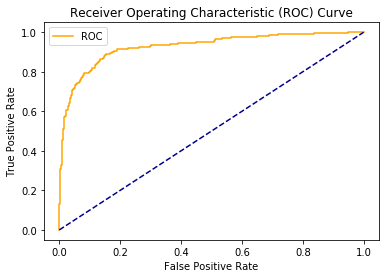

In [194]:
y_predP = lr.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

## MODELO 2 - Random Forest

In [195]:
clf = RandomForestClassifier(random_state=0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
print("{0:.1%} accuracy on validation set.".format(acc)) 

82.4% accuracy on validation set.


In [196]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[1079   11]
 [ 275  258]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1090
           1       0.96      0.48      0.64       533

    accuracy                           0.82      1623
   macro avg       0.88      0.74      0.76      1623
weighted avg       0.85      0.82      0.80      1623



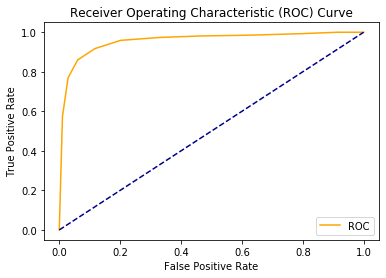

In [197]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

## MODELO 3 - Máquina de Vectores de Soporte

In [213]:
clf = svm.SVC(kernel='rbf', max_iter=10000)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

81.0% accuracy on test set.


In [214]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[1059   13]
 [ 295  256]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1072
           1       0.95      0.46      0.62       551

    accuracy                           0.81      1623
   macro avg       0.87      0.73      0.75      1623
weighted avg       0.84      0.81      0.79      1623



In [223]:
clfP = svm.SVC(kernel='rbf', max_iter=10000, probability=True)
clfP.fit(Xtrain, y_train)
y_predP = clfP.predict_proba(dataV_std_Red)

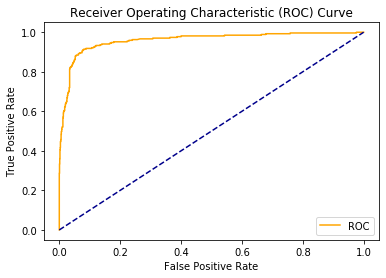

In [224]:
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

## MODELO 4 - Adaboost

In [203]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

69.4% accuracy on test set.


In [204]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[874  17]
 [480 252]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       891
           1       0.94      0.34      0.50       732

    accuracy                           0.69      1623
   macro avg       0.79      0.66      0.64      1623
weighted avg       0.78      0.69      0.65      1623



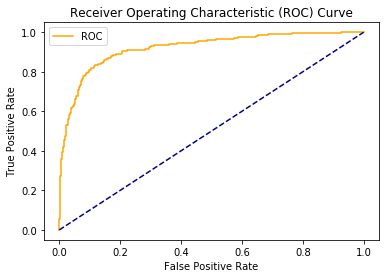

In [205]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

## MODELO 5 - XGboost

In [207]:
clf =  XGBClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
print("{0:.1%} accuracy on test set.".format(acc)) 

73.4% accuracy on test set.


In [208]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[941  18]
 [413 251]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       959
           1       0.93      0.38      0.54       664

    accuracy                           0.73      1623
   macro avg       0.81      0.68      0.68      1623
weighted avg       0.79      0.73      0.70      1623



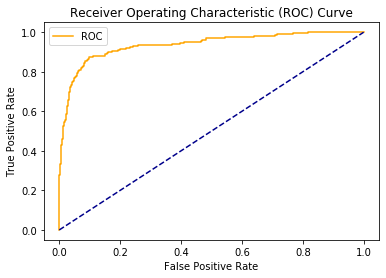

In [209]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

## MODELO 6 - Histogram-based Gradient Boosting Classification Tree

In [210]:
clf =  HistGradientBoostingClassifier()
clf.fit(Xtrain, y_train)
y_pred = clf.predict(dataV_std_Red)
# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(Y_Val, y_pred)
print("{0:.1%} accuracy on validation set.".format(acc)) 

75.4% accuracy on validation set.


In [211]:
print("Matriz de Confusión")
print(confusion_matrix(y_pred, Y_Val))
print("Reporte de Clasificación")
print(classification_report(y_pred, Y_Val))

Matriz de Confusión
[[966  12]
 [388 257]]
Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       978
           1       0.96      0.40      0.56       645

    accuracy                           0.75      1623
   macro avg       0.83      0.69      0.70      1623
weighted avg       0.81      0.75      0.72      1623



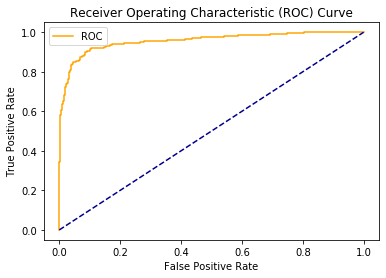

In [212]:
y_predP = clf.predict_proba(dataV_std_Red)
y_predP = y_predP[:, 1]
fper, tper, thresholds = roc_curve(Y_Val, y_predP)
plot_roc_cur(fper, tper)

 ## <font color='blue'>PUNTO 4</font>

La siguiente tabla muestra los resultados obtenidos por los diferentes modelos


|Modelos|Accuracy Train Cross-Validation|Accuracy Test All Variables|Accuracy Test Reduced Variables|Accuracy Validation Data Reduced Variables|Recall Class = 1|
| --- | --- | --- |---|---|--|
| **Regresión Logística**| 88.63%| 88% | 87.8% | 76.3% |41%|
| **Bosques Aleatorios**| 88.04%| 88% |     88.7%  |   **82.9%**|**48%**|
| **Máquina de Vectores de Soporte**| **90.85%**|**90.6%** |   **89.8%**   |   **81%**|**46%**|
| **Adaboost**| 88.38% |86.9%   |   86.8%   |   69.4%|34%|
|**XGBoost**| 90.17% |89.1%  |   88.8%   |  73.4%|38%|
|**Histogram-based Gradient Boosting Classification Tree**| **94.2%** |**94.2%**  |   **92.7%**   |  **75.4%**|40%|

El modelo Histogram BAsed Gradient Boosting Classificarion Tree presentó resultados muy favorables durante la etapa de cross validation, y puebas sobre los datos de test, con todas las variables y con variables reducidas.  Sin embargo en los datos de valdicación, su accuracy disminuyó mucho, lo cual indica que el modelo tuvo overfitting en los datos de prueba y que tal vez los datos de validación tienen alguna difererencia en sus distribuciones de datos respecto a los datos de entrenamiento.

El modelo de Bosques Aleatorios no presentó un desempeño superior a los demás modelos durante la etapa de entrenamiento, pero en los datos de validación tuvó el mejor desempeño.

El modelos de Clasificación con Máquinas de Vectores de Soporte presentó el segundo mejor desempoeño, en las etapas de entremiento y validación, por lo que presentó resultados más consistentes.  Se elegiría este modelo para efector de producción.

Sin embargo dado el desbalance de los datos de validación, a medida de accuracy es engañosa.  Para el problema en cuestión, se busca predecir pepetidos con capacidad antimicrobiana y en los datos de validación hay pocos casos con esta caracteristica, 269, frente a 1354 casos de peptidos sin capacidades antimibrobianas.

En este caso la principal medida de desempeño debería ser el recall para los casos de class = 1, es decir, la capacidad del modelo para identificar los verdaderos casos de peptidos antimicrobianos.

Bajo la medida de Recall, también los modelos SVM y Bosques aleatorios presentan un mejor desempoño que los demás, pero aún les falta potencia para clasificar un peptido como antibicrobiano, dado que en realidad lo es. SE puede decir que su capacidad predictiva condicional respecto al hecho que un peptido sea antimicrobiano es solo del 48%, pero aun así es una herramienta que mejora la eficiencia en la busqueda de potenciales peptidos antimicrobiano dado que son muy potentes en descartar los casos verdaderos de peptidos que no son antimicrobianos.